# Machine Learning: Popularity Prediction

In [1]:
# ============================================================================
# MACHINE LEARNING PIPELINE: POPULARITY PREDICTION
# ============================================================================

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df_clean_path = r"D:\UNH Materials\Projects\Spotify Song Recommendations\data\df_clean.csv"


# Step 1: Create a copy of df_clean
ml_df = pd.read_csv(df_clean_path)
print(f"\n1. Created ml_df with shape: {ml_df.shape}")

In [ ]:
print("="*80)
print("MACHINE LEARNING: POPULARITY PREDICTION")
print("="*80)


# Step 2: Select features for training
# Numerical features (audio features that might predict popularity)
numerical_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                     'instrumentalness', 'tempo', 'duration_min', 'explicit']

# Categorical features
categorical_features = ['genre', 'country', 'label']

# Check if features exist and remove any that don't
available_numerical = [f for f in numerical_features if f in ml_df.columns]
available_categorical = [f for f in categorical_features if f in ml_df.columns]

print(f"\n2. Selected Features:")
print(f"   Numerical features ({len(available_numerical)}): {available_numerical}")
print(f"   Categorical features ({len(available_categorical)}): {available_categorical}")

# Step 3: Prepare target variable
target = 'popularity'
X = ml_df[available_numerical + available_categorical]
y = ml_df[target]

print(f"\n3. Target variable: {target}")
print(f"   Target range: {y.min():.1f} to {y.max():.1f}")
print(f"   Target mean: {y.mean():.2f}")

# # Step 4: Handle missing values
# print(f"\n4. Handling missing values...")
# print(f"   Missing values in features: {X.isnull().sum().sum()}")
# X = X.fillna(X.mode().iloc[0] if len(X.mode()) > 0 else 0)  # Fill with mode or 0

## Step 5: Encode categorical features (using One-Hot Encoding)
print(f"\n5. Encoding categorical features with One-Hot Encoding...")
X_encoded = X.copy()

# Store original column names before encoding
original_columns = X_encoded.columns.tolist()

# Separate numerical and categorical columns
X_numerical = X_encoded[available_numerical].copy()
X_categorical = X_encoded[available_categorical].copy()

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop=None)
X_categorical_encoded = ohe.fit_transform(X_categorical)

# Get feature names for encoded categorical columns
categorical_feature_names = ohe.get_feature_names_out(available_categorical)

# Combine numerical and encoded categorical features
X_encoded = pd.DataFrame(
    data=np.hstack([X_numerical.values, X_categorical_encoded]),
    columns=list(available_numerical) + list(categorical_feature_names),
    index=X_encoded.index
)

# Print encoding information for each categorical column
for col in available_categorical:
    print(f"   Encoded '{col}': {X[col].nunique()} unique values")

# Step 6: Train-Test Split
print(f"\n6. Performing train-test split...")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=None
)
print(f"   Training set: {X_train.shape[0]:,} samples")
print(f"   Test set: {X_test.shape[0]:,} samples")

# Step 7: Scale numerical features
print(f"\n7. Scaling numerical features...")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[available_numerical] = scaler.fit_transform(X_train[available_numerical])
X_test_scaled[available_numerical] = scaler.transform(X_test[available_numerical])

print(f"   Scaling completed for {len(available_numerical)} numerical features")

# Prepare feature names for later use
# feature_names = available_numerical + available_categorical
feature_names = X_encoded.columns.tolist()

print("\n" + "="*80)
print("DATA PREPARATION COMPLETE")
print("="*80)

MACHINE LEARNING: POPULARITY PREDICTION

1. Created ml_df with shape: (85000, 32)

2. Selected Features:
   Numerical features (9): ['danceability', 'energy', 'key', 'loudness', 'mode', 'instrumentalness', 'tempo', 'duration_min', 'explicit']
   Categorical features (3): ['genre', 'country', 'label']

3. Target variable: popularity
   Target range: 0.0 to 100.0
   Target mean: 48.16

5. Encoding categorical features with One-Hot Encoding...
   Encoded 'genre': 12 unique values
   Encoded 'country': 10 unique values
   Encoded 'label': 8 unique values

6. Performing train-test split...
   Training set: 68,000 samples
   Test set: 17,000 samples

7. Scaling numerical features...
   Scaling completed for 9 numerical features

DATA PREPARATION COMPLETE


In [10]:
# Step 8: Train Multiple Models
print("="*80)
print("TRAINING MODELS")
print("="*80)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    # 'SVM': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
}

# Dictionary to store results
results = {}

print("\nTraining models...")
for name, model in models.items():
    print(f"\n  Training {name}...", end=" ")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }
    
    print(f"✓ (Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.2f})")

print("\n" + "="*80)
print("ALL MODELS TRAINED SUCCESSFULLY")
print("="*80)

TRAINING MODELS

Training models...

  Training Linear Regression... ✓ (Test R²: -0.0008, Test RMSE: 14.85)

  Training Ridge Regression... ✓ (Test R²: -0.0008, Test RMSE: 14.85)

  Training Random Forest... ✓ (Test R²: -0.0194, Test RMSE: 14.98)

  Training Gradient Boosting... ✓ (Test R²: -0.0022, Test RMSE: 14.86)

ALL MODELS TRAINED SUCCESSFULLY


In [11]:
# Step 9: Display Results Table
print("="*80)
print("MODEL EVALUATION RESULTS")
print("="*80)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Train MAE': [results[m]['train_mae'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()],
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()]
})

# Sort by Test R² (descending)
results_df = results_df.sort_values('Test R²', ascending=False)

print("\nResults Summary (sorted by Test R²):")
print("-"*80)
print(results_df.to_string(index=False))
print("-"*80)

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_test_r2 = results_df.iloc[0]['Test R²']
best_test_rmse = results_df.iloc[0]['Test RMSE']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R²: {best_test_r2:.4f}")
print(f"   Test RMSE: {best_test_rmse:.2f}")

MODEL EVALUATION RESULTS

Results Summary (sorted by Test R²):
--------------------------------------------------------------------------------
            Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²   Test R²
 Ridge Regression   14.823116  14.845096  11.492771 11.503328  0.000543 -0.000757
Linear Regression   14.823116  14.845098  11.492771 11.503329  0.000543 -0.000757
Gradient Boosting   14.749516  14.856097  11.438289 11.512149  0.010444 -0.002241
    Random Forest    5.607684  14.982440   4.332932 11.651551  0.856962 -0.019360
--------------------------------------------------------------------------------

🏆 Best Model: Ridge Regression
   Test R²: -0.0008
   Test RMSE: 14.85


In [12]:
# Step 10: Feature Importance (for tree-based models)
print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

feature_importance_dict = {}

# Get feature importance from tree-based models
for name, result in results.items():
    model = result['model']
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importance_dict[name] = dict(zip(feature_names, importances))
        print(f"\n{name} - Top 5 Features:")
        sorted_features = sorted(feature_importance_dict[name].items(), 
                                key=lambda x: x[1], reverse=True)[:5]
        for feat, imp in sorted_features:
            print(f"  {feat:20s}: {imp:.4f}")

# For Linear/Ridge models, use absolute coefficients as importance
for name, result in results.items():
    model = result['model']
    if hasattr(model, 'coef_'):
        coefs = np.abs(model.coef_)
        feature_importance_dict[name] = dict(zip(feature_names, coefs))
        print(f"\n{name} - Top 5 Features (by absolute coefficient):")
        sorted_features = sorted(feature_importance_dict[name].items(), 
                                key=lambda x: x[1], reverse=True)[:5]
        for feat, imp in sorted_features:
            print(f"  {feat:20s}: {imp:.4f}")


FEATURE IMPORTANCE ANALYSIS

Random Forest - Top 5 Features:
  tempo               : 0.1260
  duration_min        : 0.1252
  loudness            : 0.1241
  instrumentalness    : 0.1174
  danceability        : 0.0983

Gradient Boosting - Top 5 Features:
  duration_min        : 0.2300
  tempo               : 0.1668
  loudness            : 0.1581
  instrumentalness    : 0.0877
  danceability        : 0.0841

Linear Regression - Top 5 Features (by absolute coefficient):
  genre_Jazz          : 0.3682
  country_United Kingdom: 0.3504
  country_Mexico      : 0.3223
  genre_Hip-Hop       : 0.3150
  genre_Rock          : 0.2751

Ridge Regression - Top 5 Features (by absolute coefficient):
  genre_Jazz          : 0.3681
  country_United Kingdom: 0.3503
  country_Mexico      : 0.3222
  genre_Hip-Hop       : 0.3150
  genre_Rock          : 0.2750


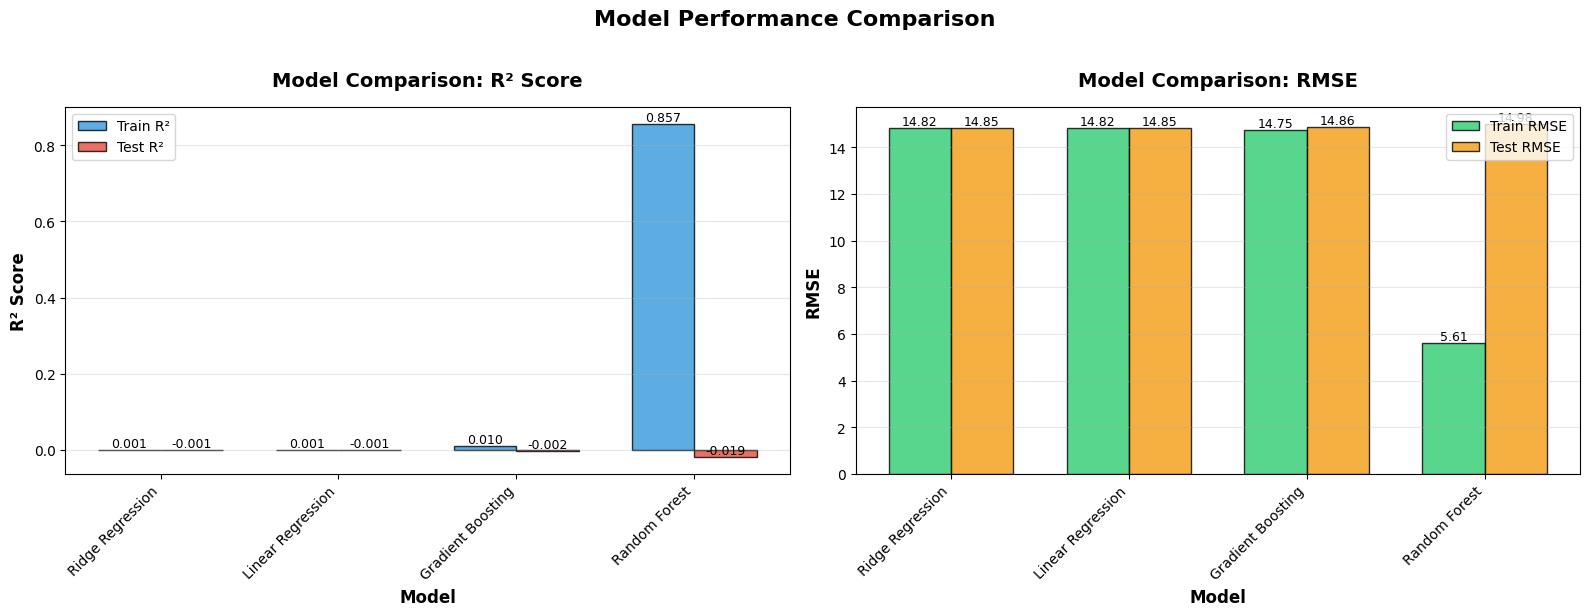

In [13]:
# Step 11: Visualizations

# 11.1: Model Comparison (R² and RMSE)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# R² Comparison
ax1 = axes[0]
models_list = results_df['Model'].values
train_r2_values = results_df['Train R²'].values
test_r2_values = results_df['Test R²'].values

x_pos = np.arange(len(models_list))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, train_r2_values, width, label='Train R²', 
                color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, test_r2_values, width, label='Test R²', 
                color='#e74c3c', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Comparison: R² Score', fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models_list, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# RMSE Comparison
ax2 = axes[1]
train_rmse_values = results_df['Train RMSE'].values
test_rmse_values = results_df['Test RMSE'].values

bars3 = ax2.bar(x_pos - width/2, train_rmse_values, width, label='Train RMSE', 
                color='#2ecc71', alpha=0.8, edgecolor='black')
bars4 = ax2.bar(x_pos + width/2, test_rmse_values, width, label='Test RMSE', 
                color='#f39c12', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
ax2.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax2.set_title('Model Comparison: RMSE', fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models_list, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

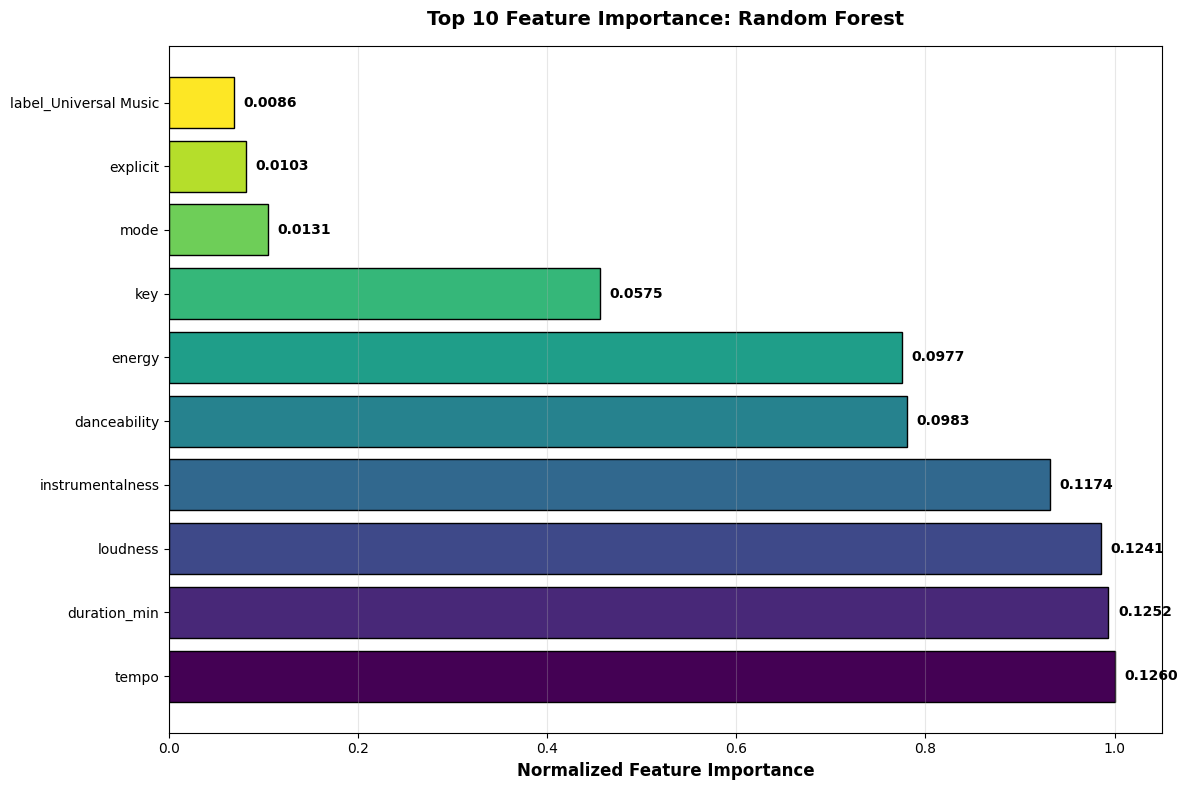

In [14]:
# 11.2: Top 10 Feature Importance (for best tree-based model)
# Use Random Forest or Gradient Boosting for feature importance
tree_models = ['Random Forest', 'Gradient Boosting']
available_tree_model = None
for model_name in tree_models:
    if model_name in feature_importance_dict:
        available_tree_model = model_name
        break

if available_tree_model:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Get top 10 features
    importances = feature_importance_dict[available_tree_model]
    sorted_features = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:10]
    features = [f[0] for f in sorted_features]
    importance_values = [f[1] for f in sorted_features]
    
    # Normalize importance values for better visualization
    max_imp = max(importance_values)
    normalized_imp = [v / max_imp for v in importance_values]
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
    bars = ax.barh(range(len(features)), normalized_imp, color=colors, edgecolor='black')
    
    ax.set_yticks(range(len(features)))
    ax.set_yticklabels(features)
    ax.set_xlabel('Normalized Feature Importance', fontsize=12, fontweight='bold')
    ax.set_title(f'Top 10 Feature Importance: {available_tree_model}', 
                 fontsize=14, fontweight='bold', pad=15)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, val, orig_val) in enumerate(zip(bars, normalized_imp, importance_values)):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
               f'{orig_val:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("No tree-based model available for feature importance visualization.")

IndexError: index 3 is out of bounds for axis 0 with size 3

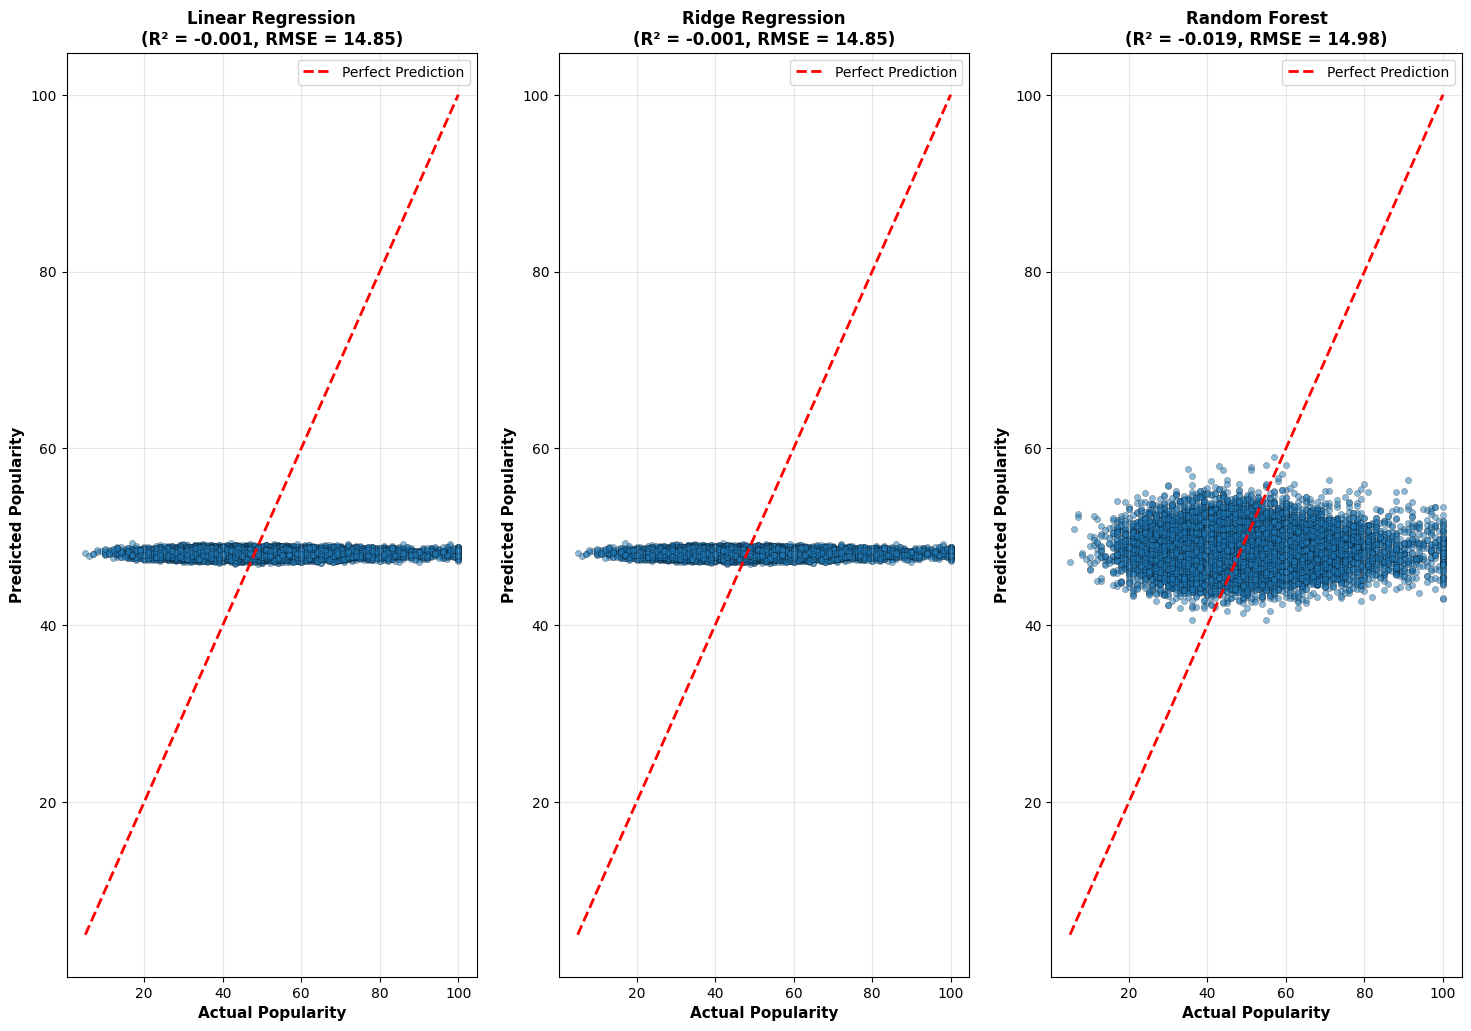

In [15]:
# 11.3: Actual vs Predicted Values (for all models)
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
axes = axes.ravel()

# Remove last subplot if we have 5 models
if len(models) == 5:
    fig.delaxes(axes[5])

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx]
    
    # Use test set predictions
    y_actual = y_test.values
    y_pred = result['y_test_pred']
    
    # Scatter plot
    ax.scatter(y_actual, y_pred, alpha=0.5, s=20, edgecolors='black', linewidth=0.3)
    
    # Perfect prediction line (y=x)
    min_val = min(y_actual.min(), y_pred.min())
    max_val = max(y_actual.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    # Labels and title
    ax.set_xlabel('Actual Popularity', fontsize=11, fontweight='bold')
    ax.set_ylabel('Predicted Popularity', fontsize=11, fontweight='bold')
    ax.set_title(f'{name}\n(R² = {result["test_r2"]:.3f}, RMSE = {result["test_rmse"]:.2f})', 
                 fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Actual vs Predicted Popularity (Test Set)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [16]:
# Step 12: Summary Statistics
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

print(f"\nDataset Information:")
print(f"  Total samples: {len(ml_df):,}")
print(f"  Training samples: {len(X_train):,}")
print(f"  Test samples: {len(X_test):,}")
print(f"  Features used: {len(feature_names)}")

print(f"\nTarget Variable Statistics:")
print(f"  Mean: {y.mean():.2f}")
print(f"  Std: {y.std():.2f}")
print(f"  Min: {y.min():.1f}")
print(f"  Max: {y.max():.1f}")

print(f"\nBest Model Performance ({best_model_name}):")
print(f"  Test R²: {best_test_r2:.4f}")
print(f"  Test RMSE: {best_test_rmse:.2f}")
print(f"  Test MAE: {results[best_model_name]['test_mae']:.2f}")

print("\n" + "="*80)
print("MACHINE LEARNING PIPELINE COMPLETE")
print("="*80)


FINAL SUMMARY

Dataset Information:
  Total samples: 85,000
  Training samples: 68,000
  Test samples: 17,000
  Features used: 39

Target Variable Statistics:
  Mean: 48.16
  Std: 14.83
  Min: 0.0
  Max: 100.0

Best Model Performance (Ridge Regression):
  Test R²: -0.0008
  Test RMSE: 14.85
  Test MAE: 11.50

MACHINE LEARNING PIPELINE COMPLETE
